In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['weatherAUS.csv']


In [27]:
df = pd.read_csv('../input/weatherAUS.csv')

In [28]:
#Lets have a quick look of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [29]:
#Now lets clean the dataset
#we can see some columns have less than 60% value,now eleminate that columns, they may affect our model
df =df.drop(columns=['Evaporation','Sunshine', 'Cloud9am','Cloud3pm'], axis =1)
df.shape

(142193, 20)

In [30]:
#We can eleminate some columns which are really need not to predict,weather it will be rain or not rain tomorrow in Austrilia
df =df.drop(columns=['Date','Location'], axis =1)
df.shape

(142193, 18)

In [31]:
#Now check the null value of dataset and deal with them
df.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [32]:
#Lets remove the null value
df = df.dropna(how = 'any')

In [33]:
#Now lets encode the catagorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
df['WindGustDir'] = labelencoder_df.fit_transform(df['WindGustDir'])
df['WindDir9am'] = labelencoder_df.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = labelencoder_df.fit_transform(df['WindDir3pm'])
df['RainToday'] = labelencoder_df.fit_transform(df['RainToday'])
df['RainTomorrow'] = labelencoder_df.fit_transform(df['RainTomorrow'])


In [34]:
#Now lets check the dataset
df.head()
df.tail()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0.0,0
142189,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0.0,0
142190,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0.0,0
142191,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0.0,0
142192,7.8,27.0,0.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0.0,0


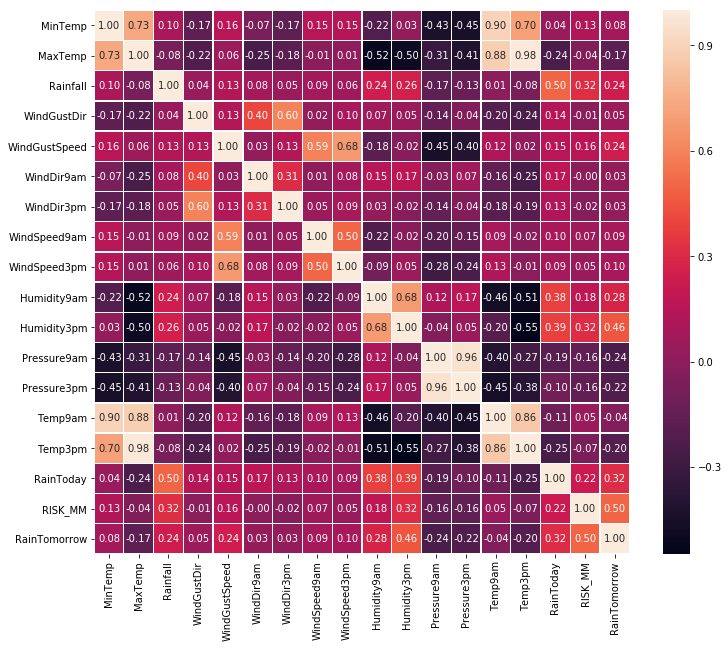

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)

In [36]:
#Now lets creat ml model
# Now take our matrix to features
x = df.iloc[:, 0 : 17].values
y = df.iloc[:, -1].values

In [37]:

#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [38]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [39]:
#Fitting Random Forest to tranning set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
classifier.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
#Predicting the test set result
y_pred = classifier.predict(x_test)

In [41]:

#Making the confusion matrix, accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classification :")
print("Accuracy = ", accuracy)
print(cm)


Random Forest Classification :
Accuracy =  0.9895505866725703
[[17414   236]
 [    0  4935]]
